# Homework 3: Convolutional Neural Networks

Due Wednesday 11/24 at 11:59 pm EST

Download the dataset `cats-notcats` from github (given as a part of the assignment). This dataset has images of cats and images that are not cats (in separate folders). The task is to train a convolutional neural network (CNN) to build a classifier that can classify a new image as either `cat` or `not cat`

1. Load the dataset and create three stratified splits - train/validation/test in the ratio of 70/10/20. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#code here
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras import models,layers
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd

I will create a dataframe with the location of each image in a class as a row with the corresponding class.

In [5]:
def dataframe_generator(label,target):
    df=pd.DataFrame(columns=['PATH'])
    for i in os.listdir('drive/MyDrive/cats-notcats/{}'.format(label)):
        df=df.append({'PATH':'{}/{}'.format(label,i)},ignore_index=True)
    df['Value']=target
    return df

In [6]:
df_cats=dataframe_generator('cats',1)
df_else=dataframe_generator('notcats',0)
df=pd.concat([df_cats,df_else])

In [7]:
x_dev, x_test, y_dev, y_test = train_test_split(df['PATH'], df['Value'], test_size=0.2, 
                                                random_state=42,stratify=df['Value'])
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.125,
                                                  random_state=42,stratify=y_dev)
def create_dataframe(x,y):
  dataset = pd.DataFrame({'PATH': x, 'Value': y}, columns=['PATH', 'Value'])
  return dataset

train = create_dataframe(x_train, y_train)
test = create_dataframe(x_test, y_test)
val = create_dataframe(x_val, y_val)

In [8]:
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_dataframe(dataframe=train, directory='/content/drive/My Drive/cats-notcats', 
                                              x_col="PATH", y_col="Value", has_ext=True, 
                                              class_mode="other", shuffle=False,target_size=(200, 200), 
                                              batch_size=20)
v_generator=datagen.flow_from_dataframe(dataframe=val, directory='/content/drive/My Drive/cats-notcats', 
                                              x_col="PATH", y_col="Value", has_ext=True, 
                                              class_mode="other", shuffle=False, target_size=(200, 200), 
                                              batch_size=20)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 3968 validated image filenames.
Found 566 validated image filenames.


2. Create a CNN that has the following hidden layers:

    a. 2D convolution layer with a 3x3 kernel size, has 128 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. Dense layer with 128 dimensions and ReLU as the activation layer

In [9]:
#code here
model=models.Sequential()
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(200,200,3), strides=1))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 128)    0         
 )                                                               
                                                                 
 dense (Dense)               (None, 100, 100, 128)     16512     
                                                                 
 flatten (Flatten)           (None, 1280000)           0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1280001   
                                                                 
Total params: 1,300,097
Trainable params: 1,300,097
Non-trainable params: 0
______________________________________________

3. Train the classifier for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [10]:
#code here
opt = Adam()
model.compile(optimizer = opt , loss = 'binary_crossentropy'
, metrics = ['accuracy'])
history=model.fit(train_generator,steps_per_epoch=100,epochs=20,validation_data=v_generator,validation_steps=20)

Epoch 1/20
100/100 [==============================] - 406s 4s/step - loss: 0.8895 - accuracy: 0.7435 - val_loss: 0.5158 - val_accuracy: 0.7775
Epoch 2/20
100/100 [==============================] - 178s 2s/step - loss: 0.4902 - accuracy: 0.7928 - val_loss: 0.4707 - val_accuracy: 0.8050
Epoch 3/20
100/100 [==============================] - 87s 875ms/step - loss: 0.4391 - accuracy: 0.8230 - val_loss: 0.4141 - val_accuracy: 0.8400
Epoch 4/20
100/100 [==============================] - 48s 455ms/step - loss: 0.3820 - accuracy: 0.8456 - val_loss: 0.4202 - val_accuracy: 0.8300
Epoch 5/20
100/100 [==============================] - 28s 284ms/step - loss: 0.3176 - accuracy: 0.8773 - val_loss: 0.4113 - val_accuracy: 0.8400
Epoch 6/20
100/100 [==============================] - 29s 295ms/step - loss: 0.2825 - accuracy: 0.8965 - val_loss: 0.4802 - val_accuracy: 0.8150
Epoch 7/20
100/100 [==============================] - 16s 163ms/step - loss: 0.2096 - accuracy: 0.9230 - val_loss: 0.4643 - val_accura

4. Plot the accuracy and the loss over epochs for train & validation sets

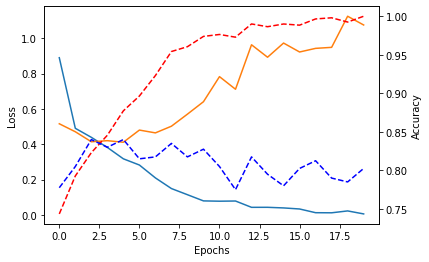

In [11]:
hist=pd.DataFrame(history.history)
fig,ax=plt.subplots()
ax.plot(hist.index,hist['loss'])
ax.plot(hist.index,hist['val_loss'])
ax.set_ylabel('Loss')
ax2=ax.twinx()
ax2.plot(hist.index,hist['accuracy'],'r--')
ax2.plot(hist.index,hist['val_accuracy'],'b--')
ax2.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
plt.show()

5. Add the following layers to (2) before the dense layer:

    a. 2D convolution layer with a 3x3 kernel size, has 64 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    b. Max pooling layer of 2x2
    
    c. 2D convolution layer with a 3x3 kernel size, has 32 filters, stride of 1 and padded to yield the same size as input, followed by a ReLU activation layer
    
    d. Max pooling layer of 2x2
    
    e. Dense layer with 256 dimensions and ReLU as the activation layer

In [12]:
#code here

model1=models.Sequential()
model1.add(layers.Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(200,200,3)))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu',strides=1))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu',strides=1))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(Flatten())
model1.add(Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 100, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)      

6. Train the classifier again for 20 epochs with 100 steps per epoch. Also use the validation data during training the estimator.

In [13]:
#code here
opt = Adam()
model1.compile(optimizer = opt , loss = 'binary_crossentropy'
, metrics = ['accuracy'])
history1=model1.fit(train_generator,steps_per_epoch=100,epochs=20,validation_data=v_generator,validation_steps=20)

Epoch 1/20
100/100 [==============================] - 20s 179ms/step - loss: 0.5809 - accuracy: 0.7384 - val_loss: 0.4783 - val_accuracy: 0.7975
Epoch 2/20
100/100 [==============================] - 17s 172ms/step - loss: 0.4650 - accuracy: 0.8120 - val_loss: 0.4078 - val_accuracy: 0.8350
Epoch 3/20
100/100 [==============================] - 17s 172ms/step - loss: 0.4641 - accuracy: 0.8053 - val_loss: 0.4665 - val_accuracy: 0.7950
Epoch 4/20
100/100 [==============================] - 17s 171ms/step - loss: 0.4364 - accuracy: 0.8214 - val_loss: 0.4178 - val_accuracy: 0.8325
Epoch 5/20
100/100 [==============================] - 17s 173ms/step - loss: 0.4722 - accuracy: 0.8130 - val_loss: 0.4322 - val_accuracy: 0.8225
Epoch 6/20
100/100 [==============================] - 17s 172ms/step - loss: 0.4190 - accuracy: 0.8300 - val_loss: 0.4542 - val_accuracy: 0.8250
Epoch 7/20
100/100 [==============================] - 17s 173ms/step - loss: 0.4220 - accuracy: 0.8370 - val_loss: 0.3951 - val_ac

7. Plot the accuracy and the loss over epochs for train & validation sets

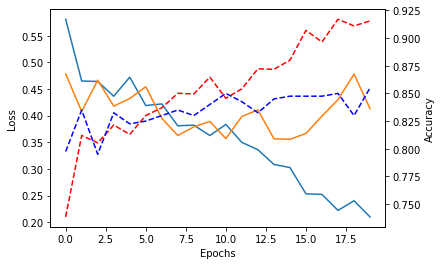

In [14]:
#code here
hist1=pd.DataFrame(history1.history)
fig,ax=plt.subplots()
ax.plot(hist1.index,hist1['loss'])
ax.plot(hist1.index,hist1['val_loss'])
ax.set_ylabel('Loss')
ax2=ax.twinx()
ax2.plot(hist1.index,hist1['accuracy'],'r--')
ax2.plot(hist1.index,hist1['val_accuracy'],'b--')
ax2.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
plt.show()